In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

__Perceptrons__

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [5]:
y_pred

array([1])

Saving figure perceptron_iris_plot


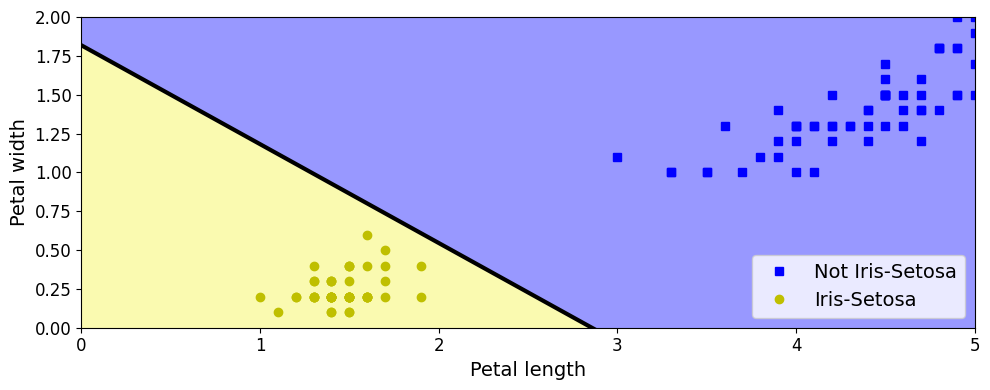

In [6]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


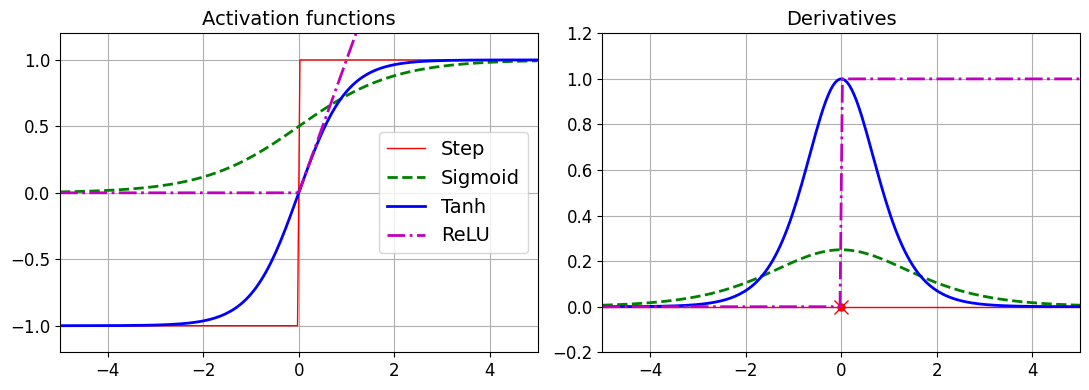

In [8]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [9]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

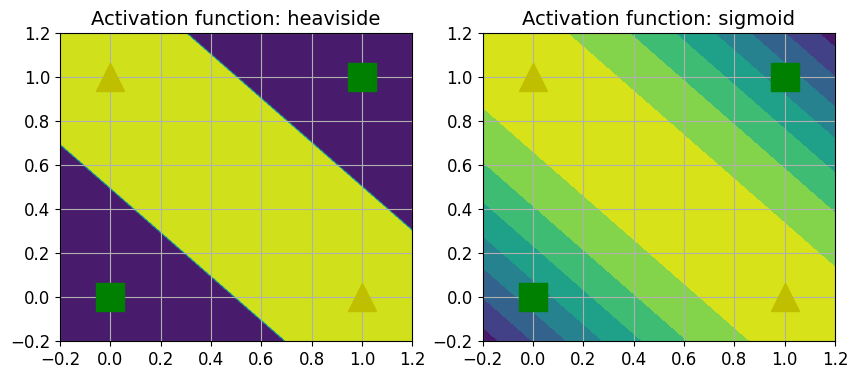

In [10]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [11]:
tf.__version__

'2.15.0'

In [12]:
from tensorflow import keras
#keras.__version__

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [14]:
X_train_full.shape

(60000, 28, 28)

In [15]:
X_train_full.dtype

dtype('uint8')

In [16]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

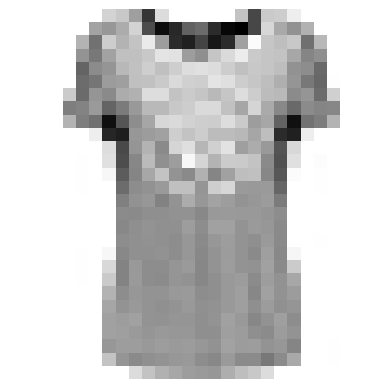

In [17]:
plt.imshow(X_train[1], cmap="binary")
plt.axis('off')
plt.show()

In [18]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [20]:
class_names[y_train[1]]

'T-shirt/top'

In [21]:
X_valid.shape

(5000, 28, 28)

Saving figure fashion_mnist_plot


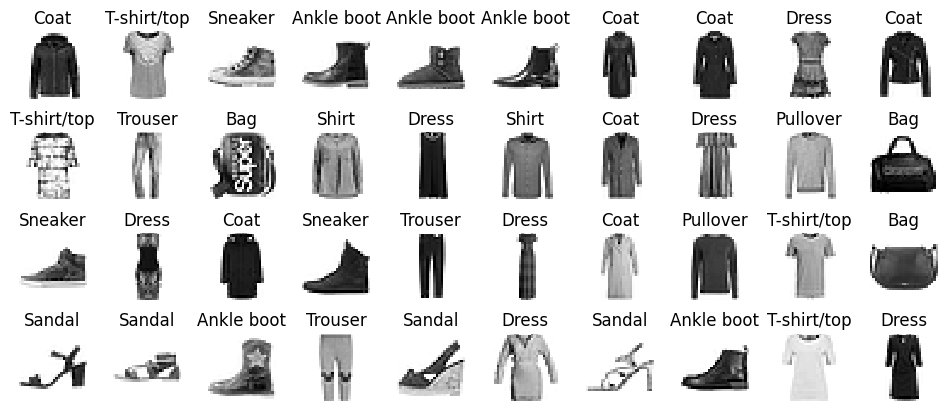

In [22]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [24]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [26]:
model.layers

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [29]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [30]:
model.get_layer(hidden1.name) is hidden1

True

In [31]:
weights, biases = hidden1.get_weights()

In [32]:
weights

array([[-0.03723612, -0.02342729,  0.03137007, ..., -0.01896524,
         0.02375269,  0.06942396],
       [ 0.03821821,  0.05638295, -0.01590168, ..., -0.00735763,
        -0.05654918, -0.07057615],
       [ 0.02022655,  0.06330793, -0.06678499, ..., -0.02057536,
        -0.05807757,  0.03226022],
       ...,
       [-0.02545317, -0.01320777, -0.06524125, ..., -0.02232445,
        -0.00985478, -0.02013832],
       [ 0.02135915,  0.03111771,  0.01916816, ..., -0.06690025,
        -0.06740784, -0.01775575],
       [ 0.03217828, -0.0672049 , -0.05903443, ...,  0.0638738 ,
        -0.04774872,  0.00057208]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
biases.shape

(300,)

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [37]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 4s 1ms/step - loss: 0.7162 - accuracy: 0.7623 - val_loss: 0.5214 - val_accuracy: 0.8224
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4893 - accuracy: 0.8289 - val_loss: 0.4421 - val_accuracy: 0.8486
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4436 - accuracy: 0.8437 - val_loss: 0.5352 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4167 - accuracy: 0.8542 - val_loss: 0.3956 - val_accuracy: 0.8676
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3980 - accuracy: 0.8613 - val_loss: 0.3814 - val_accuracy: 0.8652
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3792 - accuracy: 0.8656 - val_loss: 0.3749 - val_accuracy: 0.8710
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3666 - accuracy: 0.8705 - val_loss: 0.3658 - val_accurac

In [38]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [39]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


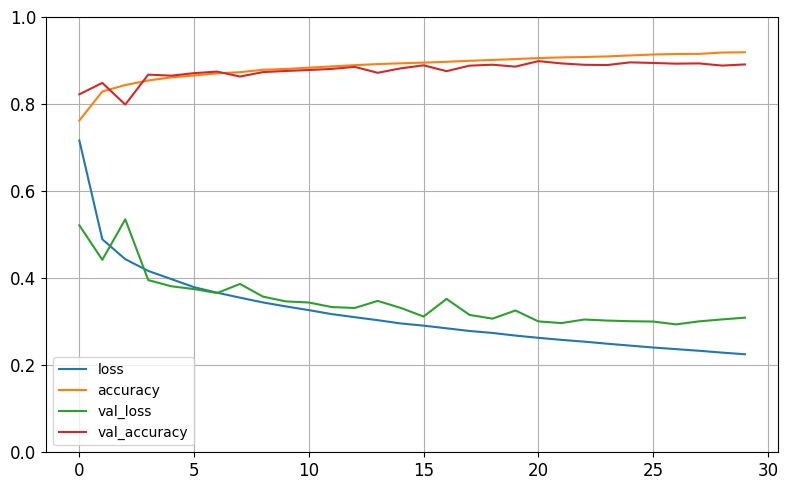

In [41]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 731us/step - loss: 0.3454 - accuracy: 0.8799


[0.345366507768631, 0.8798999786376953]

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 60ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [44]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 15ms/step


array([9, 2, 1], dtype=int64)

In [45]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [46]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


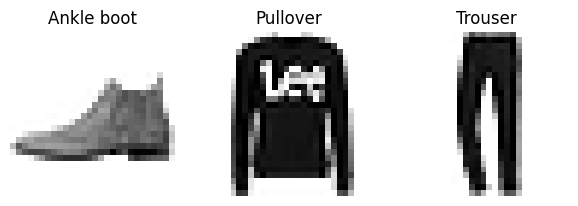

In [47]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

__Regression MLP__

_Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):_


In [48]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [49]:
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 916us/step - loss: 2.3069 - val_loss: 0.8926
Epoch 2/20
363/363 [==============================] - 0s 683us/step - loss: 0.7513 - val_loss: 0.8914
Epoch 3/20
363/363 [==============================] - 0s 693us/step - loss: 0.6408 - val_loss: 0.6651
Epoch 4/20
363/363 [==============================] - 0s 686us/step - loss: 0.5897 - val_loss: 0.5535
Epoch 5/20
363/363 [==============================] - 0s 674us/step - loss: 0.5550 - val_loss: 0.5107
Epoch 6/20
363/363 [==============================] - 0s 667us/step - loss: 0.5277 - val_loss: 0.5027
Epoch 7/20
363/363 [==============================] - 0s 663us/step - loss: 0.5066 - val_loss: 0.5142
Epoch 8/20
363/363 [==============================] - 0s 664us/step - loss: 0.4908 - val_loss: 0.4579
Epoch 9/20
363/363 [==============================] - 0s 656us/step - loss: 0.4759 - val_loss: 0.4477
Epoch 10/20
363/363 [==============================] - 0s 660us/step - loss: 0.464

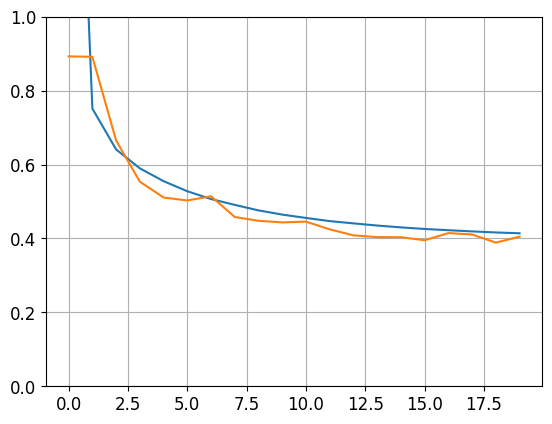

In [51]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [52]:
y_pred

array([[0.71452606],
       [1.7495093 ],
       [3.1575925 ]], dtype=float32)

__Functional API__

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see paper) connects all or part of the inputs directly to the output layer.

In [53]:
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [55]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 30)                   930       ['dense_5[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_6[0][0]']         

In [56]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 926us/step - loss: 1.8531 - val_loss: 1.1133
Epoch 2/20
363/363 [==============================] - 0s 702us/step - loss: 0.7298 - val_loss: 0.8124
Epoch 3/20
363/363 [==============================] - 0s 702us/step - loss: 0.6671 - val_loss: 0.6714
Epoch 4/20
363/363 [==============================] - 0s 727us/step - loss: 0.6259 - val_loss: 0.5849
Epoch 5/20
363/363 [==============================] - 0s 716us/step - loss: 0.5958 - val_loss: 0.5612
Epoch 6/20
363/363 [==============================] - 0s 699us/step - loss: 0.5698 - val_loss: 0.5497
Epoch 7/20
363/363 [==============================] - 0s 691us/step - loss: 0.5512 - val_loss: 0.5303
Epoch 8/20
363/363 [==============================] - 0s 688us/step - loss: 0.5352 - val_loss: 0.5069
Epoch 9/20
363/363 [==============================] - 0s 688us/step - loss: 0.5194 - val_loss: 0.4878
Epoch 10/20
363/363 [==============================] - 0s 688us/step - loss: 0.506

In [57]:
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [59]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 956us/step - loss: 2.0572 - val_loss: 1.0516
Epoch 2/20
363/363 [==============================] - 0s 735us/step - loss: 0.7940 - val_loss: 0.7254
Epoch 3/20
363/363 [==============================] - 0s 732us/step - loss: 0.6846 - val_loss: 0.6728
Epoch 4/20
363/363 [==============================] - 0s 716us/step - loss: 0.6297 - val_loss: 0.5906
Epoch 5/20
363/363 [==============================] - 0s 735us/step - loss: 0.5928 - val_loss: 0.5517
Epoch 6/20
363/363 [==============================] - 0s 738us/step - loss: 0.5640 - val_loss: 0.5480
Epoch 7/20
363/363 [==============================] - 0s 713us/step - loss: 0.5424 - val_loss: 0.5528
Epoch 8/20
363/363 [==============================] - 0s 720us/step - loss: 0.5258 - val_loss: 0.4909
Epoch 9/20
363/363 [==============================] - 0s 728us/step - loss: 0.5105 - val_loss: 0.4904
Epoch 10/20
363/363 [==============================] - 0s 738us/step - loss: 0.498

In [60]:
np.random.seed(42)
tf.random.set_seed(42)

In [61]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [62]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [63]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.5515 - main_output_loss: 3.2882 - aux_output_loss: 5.9215 - val_loss: 2.5298 - val_main_output_loss: 2.2017 - val_aux_output_loss: 5.4824
Epoch 2/20
363/363 [==============================] - 0s 826us/step - loss: 1.3530 - main_output_loss: 0.9610 - aux_output_loss: 4.8815 - val_loss: 1.7944 - val_main_output_loss: 1.4008 - val_aux_output_loss: 5.3374
Epoch 3/20
363/363 [==============================] - 0s 803us/step - loss: 0.9623 - main_output_loss: 0.6826 - aux_output_loss: 3.4791 - val_loss: 1.2232 - val_main_output_loss: 0.6655 - val_aux_output_loss: 6.2424
Epoch 4/20
363/363 [==============================] - 0s 807us/step - loss: 0.8129 - main_output_loss: 0.6186 - aux_output_loss: 2.5615 - val_loss: 1.2355 - val_main_output_loss: 0.5873 - val_aux_output_loss: 7.0693
Epoch 5/20
363/363 [==============================] - 0s 805us/step - loss: 0.7386 - main_output_loss: 0.5951 - aux_output_loss: 2.0293 - 

In [64]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 40ms/step


__The subclassing API__

In [68]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [69]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 1ms/step - loss: 2.9431 - output_1_loss: 2.6696 - output_2_loss: 5.4046 - val_loss: 2.8820 - val_output_1_loss: 2.7552 - val_output_2_loss: 4.0237
Epoch 2/10
363/363 [==============================] - 0s 786us/step - loss: 1.1267 - output_1_loss: 0.8879 - output_2_loss: 3.2757 - val_loss: 1.3626 - val_output_1_loss: 1.1046 - val_output_2_loss: 3.6847
Epoch 3/10
363/363 [==============================] - 0s 803us/step - loss: 0.9004 - output_1_loss: 0.7528 - output_2_loss: 2.2289 - val_loss: 1.0441 - val_output_1_loss: 0.6968 - val_output_2_loss: 4.1703
Epoch 4/10
363/363 [==============================] - 0s 807us/step - loss: 0.8014 - output_1_loss: 0.6941 - output_2_loss: 1.7669 - val_loss: 1.0364 - val_output_1_loss: 0.6432 - val_output_2_loss: 4.5753
Epoch 5/10
363/363 [==============================] - 0s 804us/step - loss: 0.7486 - output_1_loss: 0.6587 - output_2_loss: 1.5577 - val_loss: 1.0168 - val_output_1_loss: 0.6182 

__Saving and Restoring__

In [70]:
np.random.seed(42)
tf.random.set_seed(42)

In [71]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [72]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 949us/step - loss: 2.6048 - val_loss: 2.2069
Epoch 2/10
363/363 [==============================] - 0s 749us/step - loss: 0.7887 - val_loss: 0.6750
Epoch 3/10
363/363 [==============================] - 0s 747us/step - loss: 0.6888 - val_loss: 0.6245
Epoch 4/10
363/363 [==============================] - 0s 730us/step - loss: 0.6476 - val_loss: 0.5985
Epoch 5/10
363/363 [==============================] - 0s 770us/step - loss: 0.6158 - val_loss: 0.5644
Epoch 6/10
363/363 [==============================] - 0s 744us/step - loss: 0.5856 - val_loss: 0.5361
Epoch 7/10
363/363 [==============================] - 0s 743us/step - loss: 0.5592 - val_loss: 0.5192
Epoch 8/10
363/363 [==============================] - 0s 760us/step - loss: 0.5345 - val_loss: 0.4983
Epoch 9/10
363/363 [==============================] - 0s 731us/step - loss: 0.5119 - val_loss: 0.4756
Epoch 10/10
162/162 [==============================] - 0s 495us/step - loss: 0.479

In [75]:
model.save("my_keras_model")

INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


In [76]:
model = keras.models.load_model("my_keras_model.h5")

In [77]:
model.predict(X_new)

1/1 [==============================] - 0s 35ms/step


array([[0.8190491],
       [1.4632587],
       [2.8713326]], dtype=float32)

In [78]:
model.save_weights("my_keras_weights.ckpt")

In [79]:
model.load_weights("my_keras_weights.ckpt")

__Using Callbacks during Training__

In [83]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [84]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [85]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
289/363 [======================>.......] - ETA: 0s - loss: 2.1841INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


363/363 [==============================] - 2s 5ms/step - loss: 1.9204 - val_loss: 0.8103
Epoch 2/10
283/363 [======================>.......] - ETA: 0s - loss: 0.7538INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.7463 - val_loss: 0.6470
Epoch 3/10
285/363 [======================>.......] - ETA: 0s - loss: 0.6573INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.6516 - val_loss: 0.5874
Epoch 4/10
276/363 [=====================>........] - ETA: 0s - loss: 0.6127INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.6016 - val_loss: 0.5648
Epoch 5/10
287/363 [======================>.......] - ETA: 0s - loss: 0.5578INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.5659 - val_loss: 0.5185
Epoch 6/10
283/363 [======================>.......] - ETA: 0s - loss: 0.5338INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.5374 - val_loss: 0.4960
Epoch 7/10
293/363 [=======================>......] - ETA: 0s - loss: 0.5207INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.5153 - val_loss: 0.4734
Epoch 8/10
355/363 [============================>.] - ETA: 0s - loss: 0.4928INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.4963 - val_loss: 0.4588
Epoch 9/10
268/363 [=====================>........] - ETA: 0s - loss: 0.4902INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.4803 - val_loss: 0.4463
Epoch 10/10
281/363 [======================>.......] - ETA: 0s - loss: 0.4731INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.4665 - val_loss: 0.4389



162/162 [==============================] - 0s 508us/step - loss: 0.4492


__EarlyStopping__

In [86]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
349/363 [===========================>..] - ETA: 0s - loss: 0.4531INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.4550 - val_loss: 0.4300
Epoch 2/100
363/363 [==============================] - 0s 742us/step - loss: 0.4452 - val_loss: 0.4552
Epoch 3/100
363/363 [==============================] - 0s 720us/step - loss: 0.4367 - val_loss: 0.4442
Epoch 4/100
363/363 [==============================] - 0s 724us/step - loss: 0.4289 - val_loss: 0.4713
Epoch 5/100
286/363 [======================>.......] - ETA: 0s - loss: 0.4163INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.4232 - val_loss: 0.4281
Epoch 6/100
363/363 [==============================] - 0s 758us/step - loss: 0.4168 - val_loss: 0.4854
Epoch 7/100
363/363 [==============================] - 0s 728us/step - loss: 0.4129 - val_loss: 0.4442
Epoch 8/100
284/363 [======================>.......] - ETA: 0s - loss: 0.4095INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.4082 - val_loss: 0.4081
Epoch 9/100
363/363 [==============================] - 0s 741us/step - loss: 0.4042 - val_loss: 0.4409
Epoch 10/100
363/363 [==============================] - 0s 730us/step - loss: 0.4009 - val_loss: 0.4460
Epoch 11/100
284/363 [======================>.......] - ETA: 0s - loss: 0.4018INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3981 - val_loss: 0.3986
Epoch 12/100
363/363 [==============================] - 0s 727us/step - loss: 0.3951 - val_loss: 0.4564
Epoch 13/100
363/363 [==============================] - 0s 727us/step - loss: 0.3931 - val_loss: 0.4386
Epoch 14/100
363/363 [==============================] - 0s 719us/step - loss: 0.3910 - val_loss: 0.4089
Epoch 15/100
363/363 [==============================] - 0s 727us/step - loss: 0.3892 - val_loss: 0.4032
Epoch 16/100
291/363 [=======================>......] - ETA: 0s - loss: 0.3971INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3872 - val_loss: 0.3871
Epoch 17/100
363/363 [==============================] - 0s 731us/step - loss: 0.3853 - val_loss: 0.4360
Epoch 18/100
363/363 [==============================] - 0s 735us/step - loss: 0.3844 - val_loss: 0.4244
Epoch 19/100
363/363 [==============================] - 0s 714us/step - loss: 0.3823 - val_loss: 0.4222
Epoch 20/100
363/363 [==============================] - 0s 722us/step - loss: 0.3815 - val_loss: 0.4766
Epoch 21/100
363/363 [==============================] - 0s 730us/step - loss: 0.3802 - val_loss: 0.4337
Epoch 22/100
363/363 [==============================] - 0s 724us/step - loss: 0.3788 - val_loss: 0.4817
Epoch 23/100
282/363 [======================>.......] - ETA: 0s - loss: 0.3777INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3776 - val_loss: 0.3595
Epoch 24/100
363/363 [==============================] - 0s 751us/step - loss: 0.3766 - val_loss: 0.3994
Epoch 25/100
363/363 [==============================] - 0s 749us/step - loss: 0.3753 - val_loss: 0.4639
Epoch 26/100
363/363 [==============================] - 0s 785us/step - loss: 0.3745 - val_loss: 0.4444
Epoch 27/100
285/363 [======================>.......] - ETA: 0s - loss: 0.3763INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3740 - val_loss: 0.3566
Epoch 28/100
363/363 [==============================] - 0s 738us/step - loss: 0.3728 - val_loss: 0.4188
Epoch 29/100
363/363 [==============================] - 0s 752us/step - loss: 0.3720 - val_loss: 0.3864
Epoch 30/100
363/363 [==============================] - 0s 755us/step - loss: 0.3710 - val_loss: 0.4338
Epoch 31/100
363/363 [==============================] - 0s 782us/step - loss: 0.3696 - val_loss: 0.3803
Epoch 32/100
363/363 [==============================] - 0s 768us/step - loss: 0.3689 - val_loss: 0.4370
Epoch 33/100
363/363 [==============================] - 0s 783us/step - loss: 0.3689 - val_loss: 0.3818
Epoch 34/100
363/363 [==============================] - 0s 746us/step - loss: 0.3676 - val_loss: 0.3877
Epoch 35/100
363/363 [==============================] - 0s 769us/step - loss: 0.3669 - val_loss: 0.4366
Epoch 36/100
345/363 [===========================>..] - ETA: 0s - loss: 0.3663I

INFO:tensorflow:Assets written to: my_keras_model\assets


363/363 [==============================] - 1s 2ms/step - loss: 0.3660 - val_loss: 0.3563
Epoch 37/100
363/363 [==============================] - 0s 730us/step - loss: 0.3658 - val_loss: 0.3917
Epoch 38/100
363/363 [==============================] - 0s 785us/step - loss: 0.3649 - val_loss: 0.3849
Epoch 39/100
363/363 [==============================] - 0s 752us/step - loss: 0.3641 - val_loss: 0.3699
Epoch 40/100
363/363 [==============================] - 0s 741us/step - loss: 0.3635 - val_loss: 0.3933
Epoch 41/100
363/363 [==============================] - 0s 749us/step - loss: 0.3632 - val_loss: 0.4082
Epoch 42/100
363/363 [==============================] - 0s 727us/step - loss: 0.3628 - val_loss: 0.4085
Epoch 43/100
363/363 [==============================] - 0s 758us/step - loss: 0.3617 - val_loss: 0.4144
Epoch 44/100
363/363 [==============================] - 0s 735us/step - loss: 0.3610 - val_loss: 0.4115
Epoch 45/100
363/363 [==============================] - 0s 730us/step - loss: 0

In [87]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [88]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

350/363 [===========================>..] - ETA: 0s - loss: 0.3632
val/train: 1.03
363/363 [==============================] - 0s 832us/step - loss: 0.3654 - val_loss: 0.3771


__TensorBoard__


In [89]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [90]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2024_01_24-11_03_03'

In [91]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [92]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [93]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 2ms/step - loss: 1.9789 - val_loss: 0.7562
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6952 - val_loss: 0.8913
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6308 - val_loss: 0.7140
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5935 - val_loss: 0.5498
Epoch 5/30
363/363 [==============================] - 0s 968us/step - loss: 0.5634 - val_loss: 0.5149
Epoch 6/30
363/363 [==============================] - 0s 965us/step - loss: 0.5363 - val_loss: 0.5122
Epoch 7/30
363/363 [==============================] - 0s 987us/step - loss: 0.5142 - val_loss: 0.5086
Epoch 8/30
363/363 [==============================] - 0s 945us/step - loss: 0.4949 - val_loss: 0.4545
Epoch 9/30
363/363 [==============================] - 0s 986us/step - loss: 0.4775 - val_loss: 0.4478
Epoch 10/30
363/363 [==============================] - 0s 991us/step - loss: 0.4636 - val_